<a href="https://colab.research.google.com/github/Naveen-kumar-Y/NLP/blob/master/Predict_tags_on_StackOverflow_with_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    ! wget https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py -O setup_google_colab.py
    import setup_google_colab
    setup_google_colab.setup_week1() 
    
import sys
sys.path.append("..")
from common.download_utils import download_week1_resources

download_week1_resources()

--2020-12-27 06:49:38--  https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1939 (1.9K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   1.89K  --.-KB/s    in 0s      

2020-12-27 06:49:39 (28.4 MB/s) - ‘setup_google_colab.py’ saved [1939/1939]

File data/train.tsv is already downloaded.
File data/validation.tsv is already downloaded.
File data/test.tsv is already downloaded.
File data/text_prepare_tests.tsv is already downloaded.


In [57]:
from grader import Grader


In [58]:
grader = Grader()


In [59]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
from ast import literal_eval
import pandas as pd
import numpy as np

In [61]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [62]:
train = read_data('data/train.tsv')
validation = read_data('data/validation.tsv')
test = pd.read_csv('data/test.tsv', sep='\t')

In [63]:
train.head()

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"
4,Configuring Tomcat to Use SSL,[java]


In [64]:
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test = test['title'].values

In [65]:
X_test

array(['Warning: mysql_query() expects parameter 2 to be resource, object given',
       "get click coordinates from <input type='image'> via javascript",
       'How to implement cloud storage for media assets in ZF?', ...,
       "Javascript collection of DOM objects - why can't I reverse with Array.reverse()?",
       'How to exit (escape) a function from for loop inside of it?',
       'How to re-ask for input in try catch statement'], dtype=object)

In [66]:
import re

In [67]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = re.sub(REPLACE_BY_SPACE_RE, " ", text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(BAD_SYMBOLS_RE, "", text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS])  # Remove stopwords
    text = text.strip()
    
    
    return text

In [68]:
def test_text_prepare():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
      
      if text_prepare(ex) != ans:
          return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [69]:
print(test_text_prepare())


Basic tests are passed.


In [70]:
prepared_questions = []
for line in open('data/text_prepare_tests.tsv', encoding='utf-8'):
    line = text_prepare(line.strip())
    prepared_questions.append(line)
text_prepare_results = '\n'.join(prepared_questions)

grader.submit_tag('TextPrepare', text_prepare_results)

Current answer for task TextPrepare is:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...


In [71]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [72]:
X_train[:10]


['draw stacked dotplot r',
 'mysql select records datetime field less specified value',
 'terminate windows phone 81 app',
 'get current time specific country via jquery',
 'configuring tomcat use ssl',
 'awesome nested set plugin add new children tree various levels',
 'create map json response ruby rails 3',
 'rspec test method called',
 'springboot catalina lifecycle exception',
 'import data excel mysql database using php']

In [73]:
from collections import Counter
# Dictionary of all tags from train corpus with their counts.
tags_counts = Counter() #{}
# Dictionary of all words from train corpus with their counts.
words_counts = Counter() #{}

######################################
######### YOUR CODE HERE #############
######################################
print(X_train[:3], y_train[:3])
for sentence in X_train:
    for word in sentence.split():
        #print(word)
        words_counts[word] += 1
        #print(words_counts[word])

for l in y_train:
    for tag in l:
        tags_counts[tag] += 1

['draw stacked dotplot r', 'mysql select records datetime field less specified value', 'terminate windows phone 81 app'] [list(['r']) list(['php', 'mysql']) list(['c#'])]


In [74]:
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]

grader.submit_tag('WordsTagsCount', '%s\n%s' % (','.join(tag for tag, _ in most_common_tags), 
                                                ','.join(word for word, _ in most_common_words)))

Current answer for task WordsTagsCount is:
 javascript,c#,java
using,php,java...


In [75]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:5002]
most_common_words

[('using', 8278),
 ('php', 5614),
 ('java', 5501),
 ('file', 5055),
 ('javascript', 4746),
 ('error', 4388),
 ('get', 4301),
 ('c#', 4188),
 ('python', 4073),
 ('string', 3652),
 ('array', 3533),
 ('data', 3298),
 ('jquery', 3293),
 ('value', 3175),
 ('function', 2896),
 ('object', 2646),
 ('class', 2558),
 ('use', 2422),
 ('c++', 2312),
 ('list', 2137),
 ('method', 2123),
 ('multiple', 2096),
 ('text', 1929),
 ('image', 1849),
 ('page', 1847),
 ('rails', 1778),
 ('form', 1776),
 ('create', 1757),
 ('html', 1715),
 ('type', 1699),
 ('code', 1664),
 ('set', 1640),
 ('working', 1636),
 ('database', 1631),
 ('add', 1611),
 ('convert', 1586),
 ('mysql', 1572),
 ('json', 1557),
 ('c', 1550),
 ('server', 1543),
 ('variable', 1542),
 ('android', 1530),
 ('values', 1528),
 ('aspnet', 1506),
 ('way', 1454),
 ('application', 1451),
 ('change', 1441),
 ('button', 1385),
 ('find', 1383),
 ('django', 1373),
 ('one', 1370),
 ('without', 1369),
 ('windows', 1339),
 ('cannot', 1314),
 ('table', 1274),

In [76]:
WORDS_TO_INDEX = {p[0]:i for i,p in enumerate(most_common_words[:5])}



In [77]:
print(WORDS_TO_INDEX)


{'using': 0, 'php': 1, 'java': 2, 'file': 3, 'javascript': 4}


In [78]:
DICT_SIZE = 5000
WORDS_TO_INDEX = {p[0]:i for i,p in enumerate(most_common_words[:DICT_SIZE])}
INDEX_TO_WORDS = {WORDS_TO_INDEX[k]:k for k in WORDS_TO_INDEX}
ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    for word in text.split():
      if word in words_to_index :
        result_vector[words_to_index[word]] +=1
    return result_vector

In [79]:
def test_my_bag_of_words():
    words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3}
    examples = ['hi how are you']
    answers = [[1, 1, 0, 1]]
    for ex, ans in zip(examples, answers):
        if (my_bag_of_words(ex, words_to_index, 4) != ans).any():
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [80]:
print(test_my_bag_of_words())


Basic tests are passed.


In [81]:
from scipy import sparse as sp_sparse


In [82]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (100000, 5000)
X_val shape  (30000, 5000)
X_test shape  (20000, 5000)


In [83]:
row = X_train_mybag[10].toarray()[0]
non_zero_elements_count = np.count_nonzero(row)

grader.submit_tag('BagOfWords', str(non_zero_elements_count))

Current answer for task BagOfWords is:
 7...


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [85]:
def tfidf_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    
    tfidf_vectorizer = TfidfVectorizer(token_pattern='(\S+)', min_df=5, max_df=0.9, ngram_range=(1,2))
    
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    
    tfidf_vectorizer.fit(X_train)
    X_train = tfidf_vectorizer.transform(X_train)
    X_val = tfidf_vectorizer.transform(X_val)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_val, X_test, tfidf_vectorizer.vocabulary_

In [86]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [87]:
print('c++' in tfidf_vocab)
print('c#' in tfidf_vocab)

True
True


In [88]:
print('c++' in tfidf_vocab)
print('c#' in tfidf_vocab)

True
True


In [89]:
from sklearn.preprocessing import MultiLabelBinarizer


In [90]:
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)

In [91]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [92]:
def train_classifier(X_train, y_train, C = 1.0, penalty = 'l2'):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.

    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    lr = LogisticRegression(C=C, penalty=penalty,max_iter=200)
    oneVsRest = OneVsRestClassifier(lr)
    oneVsRest.fit(X_train, y_train)
    
    return oneVsRest

In [93]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

In [94]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

In [95]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(3):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Title:	odbc_exec always fail
True labels:	php,sql
Predicted labels:	


Title:	access base classes variable within child class
True labels:	javascript
Predicted labels:	


Title:	contenttype application json required rails
True labels:	ruby,ruby-on-rails
Predicted labels:	json,ruby-on-rails




In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [97]:
def print_evaluation_scores(y_val, predicted):
    
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    #print('accuracy')
    print(f1_score(y_val, predicted, average = 'weighted'))

In [98]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

Bag-of-words
0.6486667031464047
Tfidf
0.6142558095892964


In [99]:
from metrics import roc_auc
%matplotlib inline

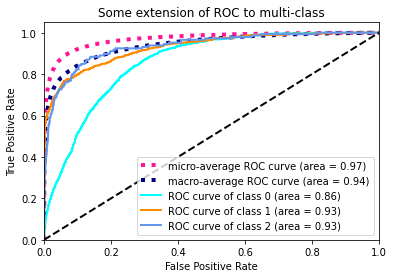

In [100]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)

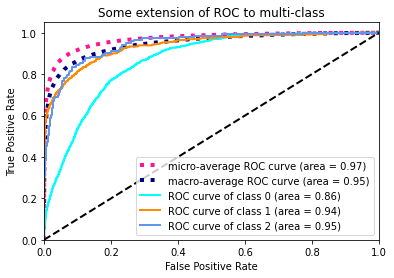

In [101]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)

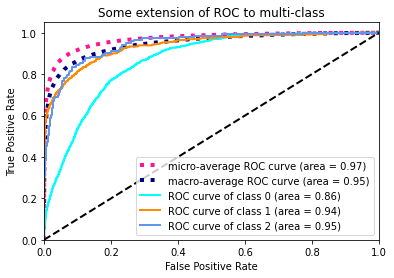

In [102]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)

In [103]:
classifier_tfidf = train_classifier(X_train_tfidf, y_train, C=1.0, penalty='l2')
y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidf)

In [104]:
test_predictions = y_test_predicted_labels_tfidf######### YOUR CODE HERE #############
test_pred_inversed = mlb.inverse_transform(test_predictions)

test_predictions_for_submission = '\n'.join('%i\t%s' % (i, ','.join(row)) for i, row in enumerate(test_pred_inversed))
grader.submit_tag('MultilabelClassification', test_predictions_for_submission)

Current answer for task MultilabelClassification is:
 0	php
1	javascript,jquery
2	
3	javascript,jquery
4	android,java
5	php,xml
6	json
7	java
8	python
9	h...


In [105]:
def print_words_for_tag(classifier, tag, tags_classes, index_to_words, all_words):
    """
        classifier: trained classifier
        tag: particular tag
        tags_classes: a list of classes names from MultiLabelBinarizer
        index_to_words: index_to_words transformation
        all_words: all words in the dictionary
        
        return nothing, just print top 5 positive and top 5 negative words for current tag
    """
    print('Tag:\t{}'.format(tag))
    
    # Extract an estimator from the classifier for the given tag.
    # Extract feature coefficients from the estimator. 
    
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    idx = tags_classes.index(tag)
    coef=classifier_tfidf.coef_[idx]
    cd = {i:coef[i] for i in range(len(coef))}
    scd=sorted(cd.items(), key=lambda x: x[1], reverse=True)
    
    top_positive_words = [index_to_words[k[0]] for k in scd[:5]] # top-5 words sorted by the coefficiens.
    top_negative_words = [index_to_words[k[0]] for k in scd[-5:]] # bottom-5 words  sorted by the coefficients.
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

In [106]:
print_words_for_tag(classifier_tfidf, 'c', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'c++', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'linux', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)

Tag:	c
Top positive words:	c, malloc, scanf, printf, gcc
Top negative words:	c#, javascript, python, php, java

Tag:	c++
Top positive words:	c++, qt, boost, mfc, opencv
Top negative words:	c#, javascript, python, php, java

Tag:	linux
Top positive words:	linux, ubuntu, c, address, signal
Top negative words:	method, array, jquery, c#, javascript



In [107]:
grader.status()


You want to submit these parts:
Task TextPrepare:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...
Task WordsTagsCount:
 javascript,c#,java
using,php,java...
Task BagOfWords:
 7...
Task MultilabelClassification:
 0	php
1	javascript,jquery
2	
3	javascript,jquery
4	android,java
5	php,xml
6	json
7	java
8	python
9	h...


In [108]:
STUDENT_EMAIL = "18211a05w9@bvrit.ac.in"# EMAIL 
STUDENT_TOKEN = "VavJQUgTeWDqzXTv"# TOKEN 
grader.status()

You want to submit these parts:
Task TextPrepare:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...
Task WordsTagsCount:
 javascript,c#,java
using,php,java...
Task BagOfWords:
 7...
Task MultilabelClassification:
 0	php
1	javascript,jquery
2	
3	javascript,jquery
4	android,java
5	php,xml
6	json
7	java
8	python
9	h...


In [109]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)


You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists.
